Importing all datasets required for Task 1

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from tensorflow.keras.preprocessing.text import Tokenizer

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras import initializers
from keras.regularizers import l1

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

Load Data and Shuffle to avoid models learning patterns in the data and overfitting

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test-1.csv")

# trainDS.sample(frac=1, random_state=42).reset_index(drop=True)
# testDS.sample(frac=1, random_state=42).reset_index(drop=True)

trainDS = train_data.sample(frac=1, random_state=42).reset_index(drop=True)
testDS = test_data.sample(frac=1, random_state=42).reset_index(drop=True)

print("Training Dataset Size:", trainDS.shape)
print("Test Dataset Size:", testDS.shape)

trainDS.head()
testDS.head()

Training Dataset Size: (2003, 3)
Test Dataset Size: (502, 3)


,category,label,text
0,Pet_Supplies_5,1,Thank goodness for Pill Pockets! I love the t...
1,Sports_and_Outdoors_5,1,"These were easy to use and assemble, the mater..."
2,Pet_Supplies_5,0,The collar did come as ordered. The gold stit...
3,Movies_and_TV_5,1,I loved it!!! Can't wait to watch it again. ...
4,Electronics_5,1,"Quiet, good airflow. Love it. Works great, jus..."


In [3]:
train_text = trainDS['text'].astype(str).values
train_labels = trainDS['label'].values

test_text = testDS['text'].astype(str).values
test_labels = testDS['label'].values

num_words = 50000

tokenizer = Tokenizer(num_words)
tokenizer.fit_on_texts(train_text)

# Convert each document into a sequence of integers
train_sequence = tokenizer.texts_to_sequences(train_text)
#test_seq = tokenizer.texts_to_sequences(test_text)

num_words = len(tokenizer.word_index)+1

for x in train_text[:3]:
    print(x)

train_sequence[:3]

length = []
for x in train_sequence:
    length.append(len(x))
max_length = max(length) + 10 #You can increasing the max length slightly in case there are some longer sentences in the test dataset
print(max_length)

The power of love is the sweetest and craziest thing.  You never know what the reaction will be. Great story.
I was disappointed with this Frankford Arsenal bullet puller...the one I got broke within 2 minutes of use and had to return for another...also, I don't like having to change out the collets depending on the caliber of bullet you are reclaiming..I should have stayed with the one collet RCBS hammer I had to start with...I gave it to a friend and choose to try a new one..shame on me.
Exciting. With a great sense of humor. And a good twist to the ending. A great short very highly recommended.
89


In [4]:
from keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_sequence, maxlen=max_length)
print(train_seq.shape)
train_seq[:3]

(2003, 89)


array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    1,  582,   11,   25,    7,    1, 2265,    2,
        2266,  189,   31,  245,  259,   69,    1, 2267,   28,   38,   12,
          65],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    4,   22,  386,   16,    8, 2268, 2269, 1536,
        1180,    1,   27,    4,  104,  428,  818,  135,  481,   11,   50,
           2,   60,    6,  652,    9,  208,   74,    4,   87,   39,  316,
           6,  482,   78,    1, 2270, 1537,   24,    1, 1181,   11, 1536,
          31,   17, 227

In [5]:
# Preprocessing test data

sequences_val = tokenizer.texts_to_sequences(test_text)
test_seq = pad_sequences(sequences_val, maxlen=max_length)
test_seq.shape

(502, 89)

MLP - Each Review represented as a Single Vector derived from pre-trained Word Embedding Vectors

Epoch 1/16
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5067 - loss: 0.6930 - val_accuracy: 0.6175 - val_loss: 0.6888
Epoch 2/16
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5709 - loss: 0.6883 - val_accuracy: 0.6673 - val_loss: 0.6802
Epoch 3/16
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6169 - loss: 0.6765 - val_accuracy: 0.6833 - val_loss: 0.6574
Epoch 4/16
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6363 - loss: 0.6580 - val_accuracy: 0.6992 - val_loss: 0.6268
Epoch 5/16
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6621 - loss: 0.6334 - val_accuracy: 0.7032 - val_loss: 0.6035
Epoch 6/16
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6821 - loss: 0.6088 - val_accuracy: 0.7231 - val_loss: 0.5713
Epoch 7/16
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7182 - loss: 0.5818 - val_accuracy: 0.7231 - val_loss: 0.5642
Epoch 8/16
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7157 - loss: 0.5855 - val_accuracy: 0.7450 - val_loss

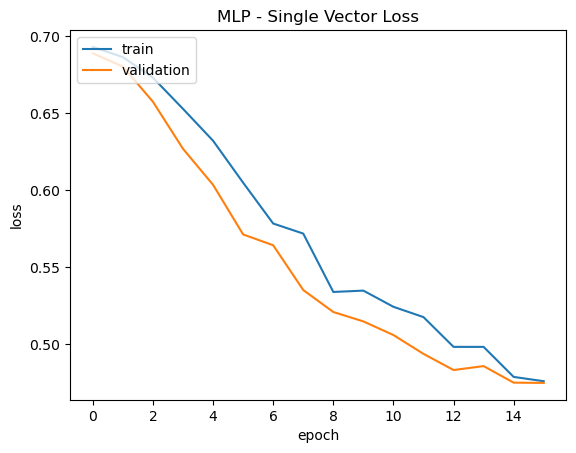

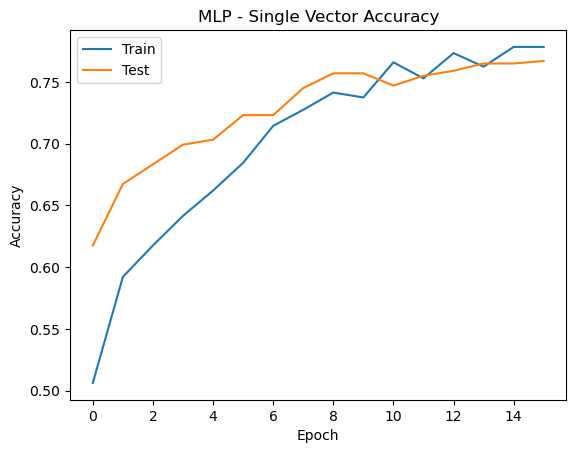

In [81]:
import gensim
from gensim.models import KeyedVectors
import re 
from gensim.scripts.glove2word2vec import glove2word2vec
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, GlobalMaxPooling1D, LSTM, GRU,Bidirectional, BatchNormalization

# Load pre-trained word vectors
embedding_dim = 100
embedding_index = {}
 
word_vectors = KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True)
 
# Function to get compute embeddings
def get_review_vector(review, word_vectors, embedding_dim=300):
    words = review.split()
    vectors = [word_vectors[word] for word in words if word in word_vectors]
    return np.mean(vectors, axis=0) if vectors else np.zeros(embedding_dim)
 
# Convert all reviews into fixed-size vectors
X_train_vectors = np.array([get_review_vector(review, word_vectors) for review in train_text])
X_test_vectors = np.array([get_review_vector(review, word_vectors) for review in test_text])

 
# Define MLP model
model = Sequential()
model.add(Dense(16, activation="relu", input_shape=(300,)))  # Input: 300-dimensional embedding vector
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
#model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))  # Binary classification
 
# Compile model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train model
#class_weights = {0: 1, 1: 2}  # Increase weight for positives
#history = model.fit(X_train_vectors, y_train, epochs=10, batch_size=32, class_weight=class_weights, validation_data=(X_test_vectors, y_test))
history = model.fit(X_train_vectors, train_labels, epochs=16, batch_size=64, validation_data=(X_test_vectors, test_labels))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MLP - Single Vector Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MLP - Single Vector Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Sample predictions: [1 1 0 1 1 0 0 0 0 0]
Ground Truth:       [1 1 0 1 1 0 0 0 1 0]

Classification Report:

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       260
           1       0.81      0.71      0.76       242

    accuracy                           0.78       502
   macro avg       0.79      0.78      0.78       502
weighted avg       0.79      0.78      0.78       502

Confusion Matrix:
 [[220  40]
 [ 69 173]]


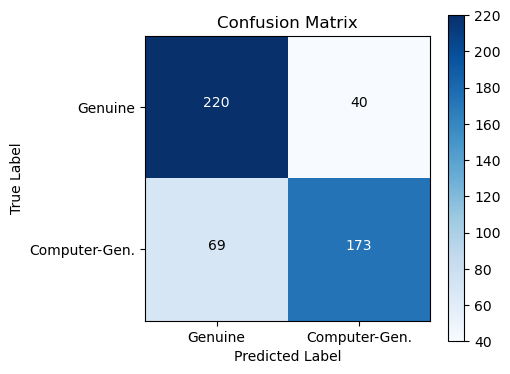

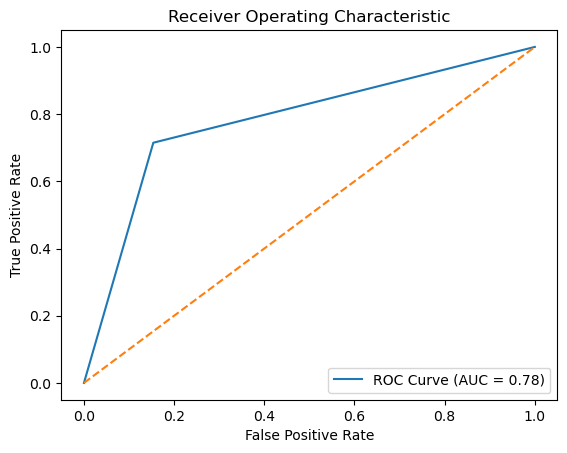

In [66]:
# Predictions
predictions = model.predict(X_test_vectors)
predictions = (predictions > 0.5).astype(int) # Changes any prediction to either 0 or 1

# Testing first 10 sentences
print("Sample predictions:", predictions[:10].ravel())
print("Ground Truth:      ", test_labels[:10].ravel())

# Classification report
print("\nClassification Report:\n")
print(classification_report(test_labels, predictions))

# Confusion matrix
cm = confusion_matrix(test_labels, predictions)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(5,4))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0,1],["Genuine","Computer-Gen."])
plt.yticks([0,1],["Genuine","Computer-Gen."])

# Labeling each cell in the confusion matrix with the count of the respective classes
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

fpr, tpr, thresholds = roc_curve(test_labels, predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

MLP with pre-trained Embedding Layer

In [18]:
word2vec_path = "/Users/samgrant/GoogleNews-vectors-negative300.bin" # Path for word2vec path
embedding_dim = 300  # dimension for GoogleNews Word2Vec

word2vec = KeyedVectors.load_word2vec_format(word2vec_path, binary=True)
print(f"[INFO] Word2Vec modelRNN loaded with vocab size = {len(word2vec.key_to_index)}")

[INFO] Word2Vec modelRNN loaded with vocab size = 3000000


In [19]:
glove_path = "/Users/samgrant/glove.6B.100d.txt"
embedding_matrix = np.zeros((num_words, 300))
for word, i in tokenizer.word_index.items():
    if word in word2vec:
        embedding_vector = word2vec[word]
        embedding_matrix[i] = embedding_vector

embedding_matrix.shape
embedding_matrix
print(np.array_equal(embedding_matrix[1] ,word2vec['the']))

True


In [20]:
#Embedding(num_words, 300, weights=[embedding_matrix], input_length=max_length, trainable=False)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


<Embedding name=embedding, built=True>

Epoch 1/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.4723 - loss: 0.9373 - val_acc: 0.5319 - val_loss: 0.8988
Epoch 2/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.5108 - loss: 0.8956 - val_acc: 0.5239 - val_loss: 0.8700
Epoch 3/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.5226 - loss: 0.8631 - val_acc: 0.6255 - val_loss: 0.8458
Epoch 4/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.5391 - loss: 0.8363 - val_acc: 0.5817 - val_loss: 0.8073
Epoch 5/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.5867 - loss: 0.8092 - val_acc: 0.6952 - val_loss: 0.7823
Epoch 6/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.6218 - loss: 0.7696 - val_acc: 0.7032 - val_loss: 0.7480
Epoch 7/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6494 - loss: 0.7377 - val_acc: 0.7012 - val_loss: 0.7204
Epoch 8/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6802 - loss: 0.7063 - val_acc: 0.7151 - val_loss: 0.6811
Epoch 9/32
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6745 - loss:

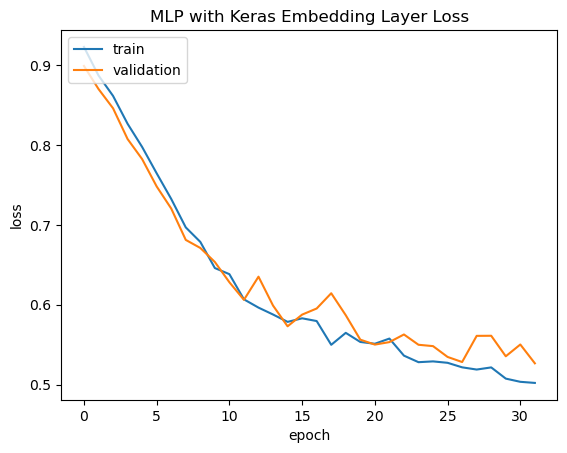

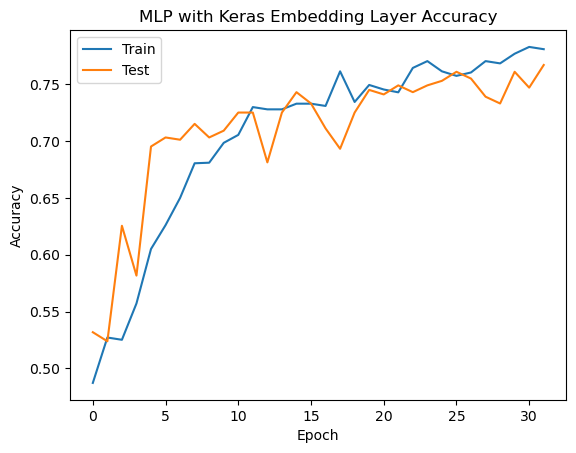

In [86]:
model_2 = Sequential()
model_2.add(Embedding(num_words, 300, weights=[embedding_matrix], input_length=max_length, trainable=False))
#modelRNN_2.add(Dropout(0.5))
#modelRNN_2.add(Flatten())
model_2.add(GlobalMaxPooling1D())
init_he_u = initializers.he_uniform(seed=None)
model_2.add(Dense(32, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(32, activation='relu',kernel_initializer=init_he_u, kernel_regularizer=l1(0.001)))
model_2.add(Dense(1, activation='sigmoid', kernel_regularizer=l1(0.001)))
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history = model_2.fit(train_seq, train_labels, validation_data=(test_seq, test_labels), epochs=32, batch_size=64, verbose=1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MLP with Keras Embedding Layer Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('MLP with Keras Embedding Layer Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7709 - loss: 0.4983 
Test Loss: 0.5220733284950256
Test Accuracy: 0.7509959936141968
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Classification Report:
                    precision    recall  f1-score   support

           Genuine       0.90      0.58      0.71       260
Computer-Generated       0.68      0.93      0.78       242

          accuracy                           0.75       502
         macro avg       0.79      0.76      0.75       502
      weighted avg       0.79      0.75      0.74       502



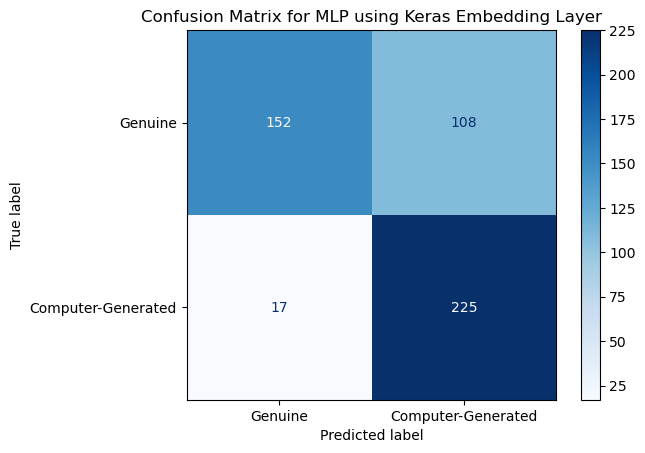

In [ ]:
# model tends to skew towards identifying Computer-Generated Reviews

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

loss, accuracy = model_2.evaluate(test_seq, test_labels)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Make predictions
y_pred_probs = model_2.predict(test_seq)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Classification report
print("Classification Report:")
print(classification_report(test_labels, y_pred, target_names=['Genuine', 'Computer-Generated']))

# Confusion matrix
cm = confusion_matrix(test_labels, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Genuine', 'Computer-Generated'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for MLP using Keras Embedding Layer")
plt.show()


Convolution Neural Network - Need to experiment with hyperparameters

In [97]:
# Experimentation : Epochs, Batch Size, Verbose, Activation Function, Kernel Regularizer

from keras.layers import Conv1D, GlobalMaxPooling1D
cnn_1 = Sequential()
cnn_1.add(Embedding(num_words, 300, weights=[embedding_matrix], input_length=max_length, trainable=False))
#init_he_u = initializers.he_uniform(seed=None)
cnn_1.add(Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1))
cnn_1.add(Flatten())
#cnn_1.add(GlobalMaxPooling1D())
cnn_1.add(Dropout(0.5))
cnn_1.add(Dense(64, activation='relu', kernel_regularizer=l1(0.001)))
cnn_1.add(Dropout(0.5))
cnn_1.add(Dense(1, activation='sigmoid'))
cnn_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history2 = cnn_1.fit(train_seq, train_labels, validation_data=(test_seq, test_labels), epochs=10, batch_size=32, verbose=1)

Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - acc: 0.7507 - loss: 3.9057 - val_acc: 0.8167 - val_loss: 0.7919
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.8873 - loss: 0.6371 - val_acc: 0.8207 - val_loss: 0.7278
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 0.8940 - loss: 0.5643 - val_acc: 0.8167 - val_loss: 0.6186
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.8846 - loss: 0.5444 - val_acc: 0.8187 - val_loss: 0.6235
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 0.8919 - loss: 0.5104 - val_acc: 0.8227 - val_loss: 0.6244
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.9246 - loss: 0.4496 - val_acc: 0.8307 - val_loss: 0.5639
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 0.9276 - loss: 0.4363 - val_acc: 0.8287 - val_loss: 0.5878
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.9306 - loss: 0.4212 - val_acc: 0.8367 - val_loss: 0.5557
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc: 0.9436 - loss: 0.40

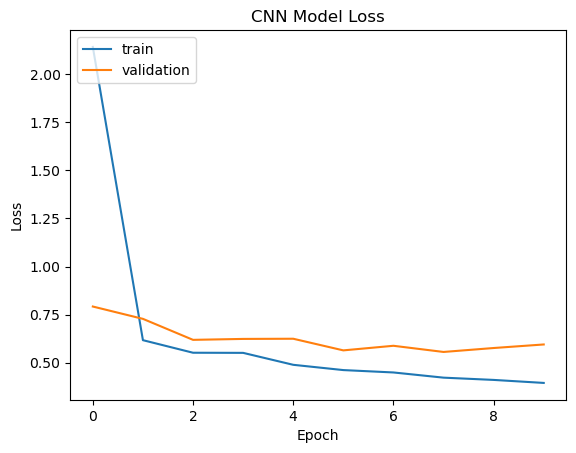

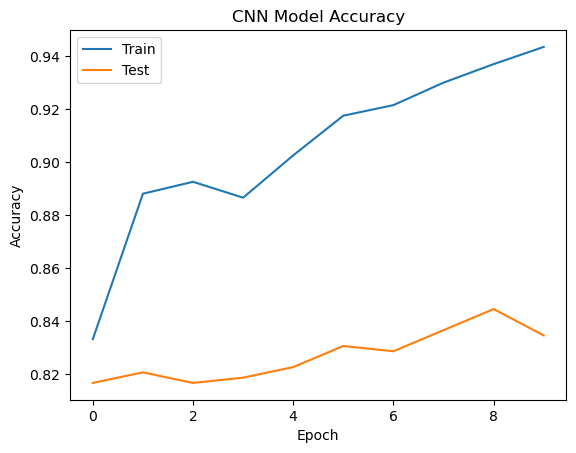

In [98]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.8236 - loss: 0.5844
Test Loss: 0.5946364402770996
Test Accuracy: 0.8346613645553589
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Sample predictions: [0 1 0 1 0 0 0 1 1 0]
Ground Truth:       [1 1 0 1 1 0 0 0 1 0]

Classification Report:
              precision    recall  f1-score   support

           0     0.8899    0.7769    0.8296       260
           1     0.7891    0.8967    0.8395       242

    accuracy                         0.8347       502
   macro avg     0.8395    0.8368    0.8345       502
weighted avg     0.8413    0.8347    0.8343       502


Confusion Matrix:
[[202  58]
 [ 25 217]]


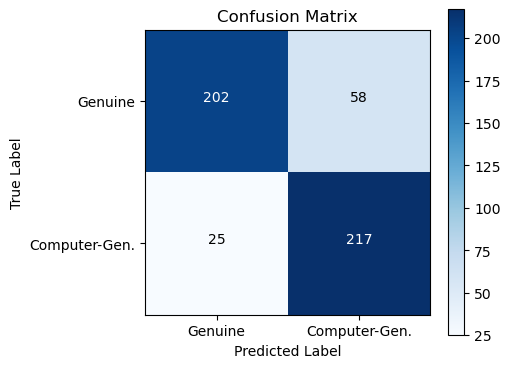

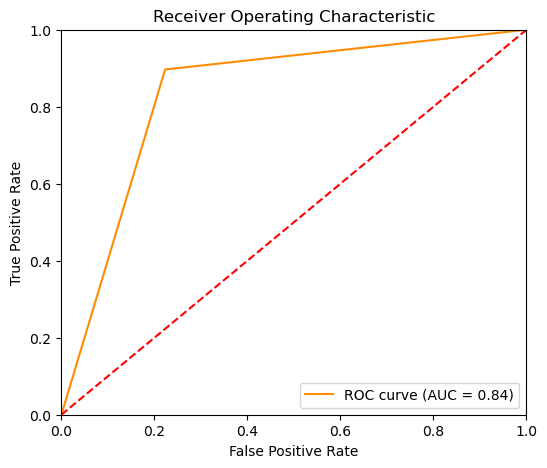

In [99]:
# CNN Metrics
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate on the test set
loss, accuracy = cnn_1.evaluate(test_seq, test_labels)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Predictions
predictions = cnn_1.predict(test_seq)
predictions = (predictions > 0.5).astype(int)

print("Sample predictions:", predictions[:10].ravel())
print("Ground Truth:      ", test_labels[:10].ravel())


print("\nClassification Report:")
print(classification_report(test_labels, predictions, digits=4))

cm = confusion_matrix(test_labels, predictions)

print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(5,4))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0,1],["Genuine","Computer-Gen."])
plt.yticks([0,1],["Genuine","Computer-Gen."])

# Labeling each cell in the conf. matrix with the count of the respective classes
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

fpr, tpr, thresholds = roc_curve(test_labels, predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

RNN Model using Keras Embedding Layer - Coded separately before implementing within current Jupyter Notebook file.

In [60]:
# DS used for 'Dataset'
trainDS = pd.read_csv("train.csv")
testDS = pd.read_csv("test-1.csv")

# Shuffling datasets
train_data = trainDS.sample(frac=1, random_state=42).reset_index(drop=True)
test_data = testDS.sample(frac=1, random_state=42).reset_index(drop=True)

#train_data = pd.read_csv("train.csv")
#test_data = pd.read_csv("test-1.csv")

print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)

X_train_texts = train_data['text'].astype(str).tolist()
y_train = train_data['label'].values

X_test_texts = test_data['text'].astype(str).tolist()
y_test = test_data['label'].values

# Checking shuffled results
print(X_test_texts[1]) 
print(y_test[1])

train_data.head()
test_data.head()

Training data shape: (2003, 3)
Testing data shape: (502, 3)
These were easy to use and assemble, the materials are good and sturdy, and the handle fits the
1


,category,label,text
0,Pet_Supplies_5,1,Thank goodness for Pill Pockets! I love the t...
1,Sports_and_Outdoors_5,1,"These were easy to use and assemble, the mater..."
2,Pet_Supplies_5,0,The collar did come as ordered. The gold stit...
3,Movies_and_TV_5,1,I loved it!!! Can't wait to watch it again. ...
4,Electronics_5,1,"Quiet, good airflow. Love it. Works great, jus..."


In [61]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(X_train_texts)
train_sequences = tokenizer.texts_to_sequences(X_train_texts)
test_sequences = tokenizer.texts_to_sequences(X_test_texts)

lengths = [len(txt.split()) for txt in X_train_texts]
max_len = max(lengths)
print("Max training text length:", max_len)

x_train_seq = pad_sequences(train_sequences, maxlen=max_len)
x_test_seq = pad_sequences(test_sequences, maxlen=max_len)

Max training text length: 78


In [ ]:
file = 'GoogleNews-vectors-negative300.bin'
word2vec = KeyedVectors.load_word2vec_format(file, binary=True)

num_words = len(tokenizer.word_index)+1
embedding_matrix = np.zeros((num_words, 300))
for word, i in tokenizer.word_index.items():
    if word in word2vec:
        embedding_vector = word2vec[word]
        embedding_matrix[i] = embedding_vector

print("Embedding matrix shape:", embedding_matrix.shape)

Embedding matrix shape: (4950, 300)


In [105]:
modelRNN = Sequential()
modelRNN.add(Embedding(input_dim=num_words,output_dim=300,weights=[embedding_matrix],input_length=max_len,trainable=False))
modelRNN.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
#modelRNN.add(BatchNormalization())
modelRNN.add(Dense(128, activation='relu'))
modelRNN.add(Dense(1, activation='sigmoid'))
modelRNN.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#print(modelRNN.summary())

# Train modelRNN
history = modelRNN.fit(x_train_seq,y_train,epochs=5,batch_size=32,validation_data=(x_test_seq, y_test))

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.5660 - loss: 0.6688 - val_accuracy: 0.7769 - val_loss: 0.4484
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.7722 - loss: 0.4442 - val_accuracy: 0.8187 - val_loss: 0.3577
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.8561 - loss: 0.3168 - val_accuracy: 0.8287 - val_loss: 0.3306
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.8899 - loss: 0.2573 - val_accuracy: 0.8406 - val_loss: 0.2986
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.9085 - loss: 0.2114 - val_accuracy: 0.8426 - val_loss: 0.3468


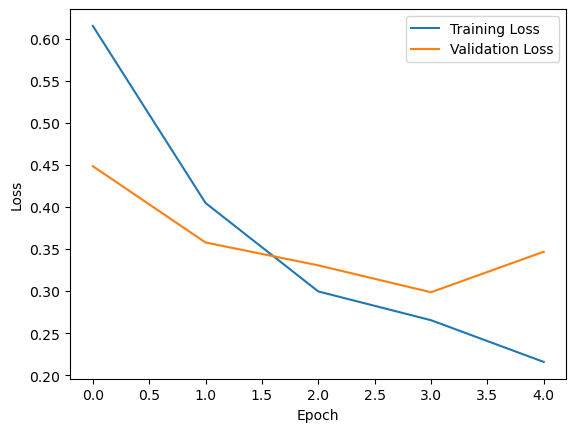

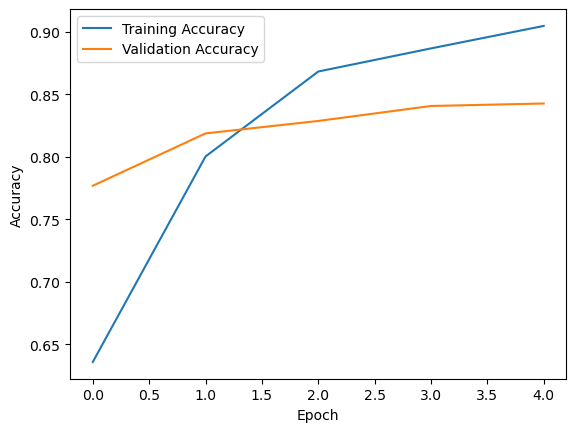

In [106]:
import matplotlib.pyplot as plt

# Plotting Training and Validation Loss
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting Training and Validation Accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8659 - loss: 0.3304
Test Loss: 0.3479807674884796
Test Accuracy: 0.8625497817993164
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step
Sample predictions: [0 1 0 1 0 0 0 0 1 0]
Ground Truth:       [1 1 0 1 1 0 0 0 1 0]

Key Metrics:
              precision    recall  f1-score   support

           0     0.8631    0.8731    0.8681       260
           1     0.8619    0.8512    0.8565       242

    accuracy                         0.8625       502
   macro avg     0.8625    0.8622    0.8623       502
weighted avg     0.8625    0.8625    0.8625       502


Confusion Matrix:
[[227  33]
 [ 36 206]]


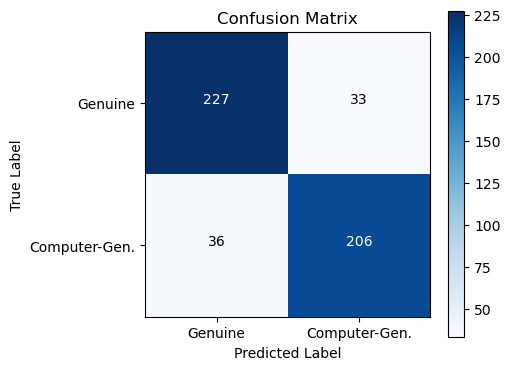

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate on the test set
loss, accuracy = modelRNN.evaluate(x_test_seq, y_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Predictions
predictions = modelRNN.predict(x_test_seq)
predictions = (predictions > 0.5).astype(int)

print("Sample predictions:", predictions[:10].ravel())
print("Ground Truth:      ", y_test[:10].ravel())


print("\nKey Metrics:")
print(classification_report(y_test, predictions, digits=4))

cm = confusion_matrix(y_test, predictions)

print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(5,4))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0,1],["Genuine","Computer-Gen."])
plt.yticks([0,1],["Genuine","Computer-Gen."])

# Labeling each cell in the conf. matrix with the count of the respective classes
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

K-Fold Cross Validation for RNN Model


 Fold 1
Fold 1 Accuracy: 0.8778 | Loss: 0.2822

 Fold 2
Fold 2 Accuracy: 0.9102 | Loss: 0.2632

 Fold 3
Fold 3 Accuracy: 0.8953 | Loss: 0.2568

 Fold 4
Fold 4 Accuracy: 0.9175 | Loss: 0.1988

 Fold 5
Fold 5 Accuracy: 0.9075 | Loss: 0.1921

K-Fold Validation Accuracies:
Fold 1: 0.8778
Fold 2: 0.9102
Fold 3: 0.8953
Fold 4: 0.9175
Fold 5: 0.9075

Average Accuracy: 0.9017
 Average Loss: 0.2386


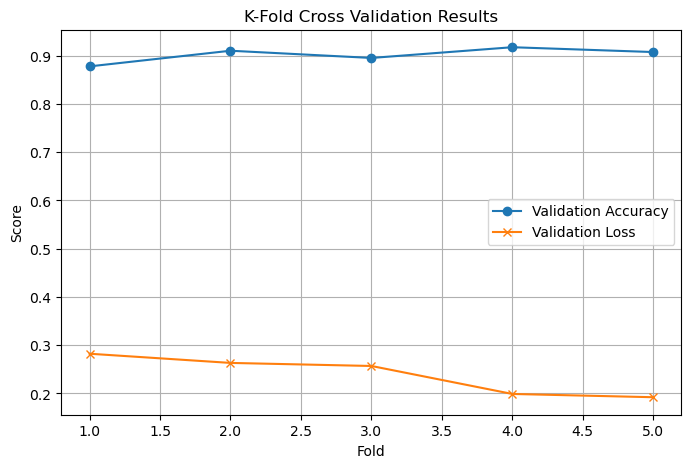

In [ ]:
from sklearn.model_selection import KFold
from tensorflow.keras import backend as K

kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracies = []
fold_losses = []

for fold, (train_idx, val_idx) in enumerate(kf.split(x_train_seq)):
    print(f"\n Fold {fold+1}")

    # Split data
    x_train_fold, x_val_fold = x_train_seq[train_idx], x_train_seq[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    modelRNN = Sequential()
    modelRNN.add(Embedding(input_dim=num_words,output_dim=300,weights=[embedding_matrix],input_length=max_len,trainable=False))
    modelRNN.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
    modelRNN.add(Dense(128, activation='relu'))
    modelRNN.add(Dense(1, activation='sigmoid'))
    modelRNN.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    


    #history = modelRNN.fit(x_train_seq,y_train,epochs=5,batch_size=32,validation_data=(x_test_seq, y_test))
    
    # Train on fold
    history = modelRNN.fit(x_train_fold, y_train_fold, epochs=10, batch_size=32, verbose=0, validation_data=(x_val_fold, y_val_fold))
    
    # Evaluate
    val_loss, val_acc = modelRNN.evaluate(x_val_fold, y_val_fold, verbose=0)
    print(f"Fold {fold+1} Accuracy: {val_acc:.4f} | Loss: {val_loss:.4f}")
    
    fold_losses.append(val_loss)
    fold_accuracies.append(val_acc)
    
    K.clear_session()

# Final results
print("\nK-Fold Validation Accuracies:")
for i, acc in enumerate(fold_accuracies, 1):
    print(f"Fold {i}: {acc:.4f}")

print(f"\nAverage Accuracy: {np.mean(fold_accuracies):.4f}")
print(f" Average Loss: {np.mean(fold_losses):.4f}")

# Plotting
plt.figure(figsize=(8,5))
plt.plot(range(1, 6), fold_accuracies, marker='o', label='Validation Accuracy')
plt.plot(range(1, 6), fold_losses, marker='x', label='Validation Loss')
plt.title('K-Fold Cross Validation Results')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()
